In [4]:
using Gadfly

## 共轭梯度法


In [1]:
norm(x) = sqrt(x'*x)
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [96]:
xn, fn, gn, steps=
ConjugateGradientFSO(
    (x,y)->x^2+3*x*y+13*y^2-x-22*y,
    (x,y)->[2*x+3*y-1,3*x+13*(2*y)-22],
    [2 3;3 26],
    [1.,1.],
    debug=false
)

Convergence is reached after 2 iterations.


([-0.930233, 0.953488], -10.023255813953488, [-2.22045e-16, 3.55271e-15], Any[[1.0, 1.0], [0.823609, 0.691316], [-0.930233, 0.953488]])

## 最速下降

In [83]:
function search_for_α(f,xk,fk,d,g;
    a0=100,ϵ=0.5,τ=0.5)
    α=a0
    ϕ0=d'*g
    while f((xk.+α*d)...)>fk+ϵ* α*ϕ0
        α=τ*α
    end
    return α
end
function steepest_descent(f,g,x0;
        ϵx=0.01,ϵf=0.001,ϵg=0.001,maxIter=1000,debug=false)
    
    xk=x0
    fk=f(xk...)
    c=[]
    for i in 1:maxIter
        push!(c,xk)
        d=-g(xk...)#待解决
        α=search_for_α(f,xk,fk,d,-d)
        δ = α*d
        xn=xk.+δ
        fn=f(xn...)
        
       if (norm(δ)<=ϵx)&&((abs(fn-fk))<=ϵf)&&((norm(d)<=ϵg))
            println("conver",i,"α=",α)
            return (xk,fk,d,δ,c)
        end
        if debug
            println("i=",i,"α=",α,"xk=",xk,"fk=",fk,"d=",d)
        end
        xk=xn
        fk=fn
    end
    println("WANING:",maxIter,"out of the maxIter")
end

steepest_descent (generic function with 1 method)

In [106]:
xk,fk,d,δ,c=
steepest_descent(
    (x,y)->x^2+3*x*y+13*y^2-x-22*y,
    (x,y)->[2*x+3*y-1,3*x+13*(2*y)-22],
    [1,1]
    )

conver50α=0.1953125


([-0.929715, 0.953412], -10.023255588617308, [-0.000806118, 0.000435155], [-0.000157445, 8.49913e-5], Any[[1, 1], [0.902344, 0.829102], [0.741602, 0.718571], [0.226189, 0.931921], [0.116416, 0.789904], [-0.0400823, 0.89862], [-0.118974, 0.837884], [-0.368135, 0.94959], [-0.395295, 0.910895], [-0.487297, 0.862322]  …  [-0.927952, 0.953085], [-0.928115, 0.953263], [-0.92881, 0.953167], [-0.928902, 0.953367], [-0.929126, 0.953286], [-0.929205, 0.953381], [-0.929543, 0.953325], [-0.929565, 0.953378], [-0.929663, 0.953463], [-0.929715, 0.953412]])

## 牛顿法

In [81]:
function Newton(f,g,h,x0;
        ϵx=0.01,  #precision for step size
        ϵf=0.01,  #precision for objective function
        ϵg=0.01,  #precision for gradient
        maxIterations=128,
        debug=true
    )
    
    xk=x0
    fk=f(xk...)
    
   c=[]

    for i in 1:maxIterations
        # iteration 
        push!(c,xk)
        d=-inv(h(xk...))*g(xk...)  ###xk...表示将矩阵和参数一一对应
        α=1
        δ=α*d
        xn=xk.+δ  #X(k+1)=X(k)+αd
        fn=f(xn...)
        # converagence?
        if (norm(δ)<=ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)
            println("Converagence is reached after ",i," iterations")
            return (xk,fk,d,δ,c)
        end
        if debug
            println("i=",i,"α=",α,"xk=",xk,"xn=",xn,"d=",d,"δ=",δ,"   ",c)
            println("fk=",fk,"fn=",fn)
        end
       
        xk=xn
        fk=fn
    end
    println("Warn:",maxIterations,"have been exceeded!")
end


Newton (generic function with 1 method)

In [107]:
xk,fk,d,δ,c1=
@time Newton(
    (x,y)->x^2+3*x*y+13*y^2-x-22*y,
    (x,y)->[2*x+3*y-1,3*x+13*(2*y)-22],
    (x,y)->[2 3;
           3  26],
    [1,1],
    debug=true
    )

i=1α=1xk=[1, 1]xn=[-0.930233, 0.953488]d=[-1.93023, -0.0465116]δ=[-1.93023, -0.0465116]   Any[[1, 1]]
fk=-6fn=-10.02325581395349
Converagence is reached after 2 iterations
  0.087568 seconds (201.30 k allocations: 10.816 MiB)


([-0.930233, 0.953488], -10.02325581395349, [2.06553e-17, 1.3426e-16], [2.06553e-17, 1.3426e-16], Any[[1, 1], [-0.930233, 0.953488]])

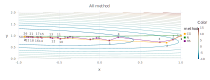

In [109]:
fun=layer((x,y)->x^2+3*x*y+13*y^2-x-22*y, -1, 1, 0, 2);

CG=layer(
    x=[steps[i][1] for i in 1:length(steps)],
    y=[steps[i][2] for i in 1:length(steps)],
    label=[string(i) for i in 1:length(steps)],
    Geom.point, Geom.line,Geom.label,Theme(default_color="orange"));
N=layer(
    x=[c1[i][1] for i in 1:length(c1)],
    y=[c1[i][2] for i in 1:length(c1)],
    label=[string(i) for i in 1:length(c1)],
    Geom.point, Geom.line,Geom.label,Theme(default_color="green"));
HS=layer(
    x=[c[i][1] for i in 1:length(c)],
    y=[c[i][2] for i in 1:length(c)],
    label=[string(i) for i in 1:length(c)],
    Geom.point, Geom.line,Geom.label,Theme(default_color="purple"));

plot(fun, ConjugateGradient,newton,hs,Guide.title("All method"),#Guide.xlabel("Stimulus"), Guide.ylabel("Response"), 
    Guide.manual_color_key("method", ["CG", "N", "HS"],
                            ["orange", "green", "purple"]))

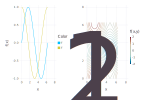

In [47]:
p1 = plot([sin,cos], 0, 2pi)
p2 = plot((x,y)->sin(x)+cos(y), 0, 2pi, 0, 2pi)
hstack(p1,p2)#多图合并

In [59]:
using Pkg

In [61]:
Pkg.add("RDatasets")

  Updating registry at `C:\Users\Biocc\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  21.9 %>                    ]  48.2 % %>               ]  62.5 %]  64.9 % Resolving package versions...
 Installed TranscodingStreams ─ v0.9.4
 Installed RData ────────────── v0.6.0
 Installed FileIO ───────────── v1.0.6
   Cloning [78c3b35d-d492-501b-9361-3d52fe80e533] Mocking from https://github.com/invenia/Mocking.jl.git
   Cloning [ce6b1742-4840-55fa-b093-852dadbb1d8b] RDatasets from https://github.com/johnmyleswhite/RDatasets.jl.git   ]  50.2 %Fetching: [======================>                  ]  53.5 %>           ]  70.4 %4 %>    ]  88.5 %=====================================>   ]  91.2 %


┌ Info: Installed Mocking ──────────── v0.5.7
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Pkg\src\Operations.jl:637


Fetching: [========================================>]  99.9 %0.0 % % % % %8 %   Cloning [31c24e10-a181-5473-b8eb-7969acd0382f] Distributions from https://github.com/JuliaStats/Distributions.jl.git


┌ Info: Installed RDatasets ────────── v0.6.1
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Pkg\src\Operations.jl:637


Fetching: [========================================>]  100.0 %                               ]  21.3 %   Cloning [f269a46b-ccf7-5d73-abea-4c690281aa53] TimeZones from https://github.com/JuliaTime/TimeZones.jl.git


┌ Info: Installed Distributions ────── v0.18.0
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Pkg\src\Operations.jl:637


Fetching: [========================================>]  100.0 %.0 % [===========>                             ]  26.2 %>                  ]  54.2 %           ]  70.8 % [=============================>           ]  72.0 %   ]  90.3 %9 %   Cloning [8f5d6c58-4d21-5cfd-889c-e3ad7ee6a615] EzXML from https://github.com/bicycle1885/EzXML.jl.git


┌ Info: Installed TimeZones ────────── v0.9.0
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Pkg\src\Operations.jl:637


Fetching: [========================================>]  99.9 %32.3 %>          ]  73.2 %.9 %>]  99.3 %]  99.7 %

┌ Info: Installed EzXML ────────────── v0.9.1
└ @ Pkg.Operations C:\cygwin\home\Administrator\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.1\Pkg\src\Operations.jl:637


  Updating `C:\Users\Biocc\.julia\environments\v1.1\Project.toml`
  [ce6b1742] + RDatasets v0.6.1
  Updating `C:\Users\Biocc\.julia\environments\v1.1\Manifest.toml`
  [31c24e10] ↑ Distributions v0.17.0 ⇒ v0.18.0
  [8f5d6c58] + EzXML v0.9.1
  [5789e2e9] + FileIO v1.0.6
  [78c3b35d] + Mocking v0.5.7
  [df47a6cb] + RData v0.6.0
  [ce6b1742] + RDatasets v0.6.1
  [f269a46b] + TimeZones v0.9.0
  [3bb67fe8] ↑ TranscodingStreams v0.9.3 ⇒ v0.9.4
  Building EzXML ────→ `C:\Users\Biocc\.julia\packages\EzXML\r19gO\deps\build.log`
  Building TimeZones → `C:\Users\Biocc\.julia\packages\TimeZones\oXITd\deps\build.log`


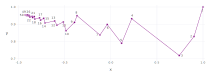

In [86]:
hs=
layer(x=c2,
      y=c3,
      label=[string(i) for i in 1:length(c)],
    
    Geom.point,Geom.line,Geom.label,Theme(default_color="purple")
)
plot(hs)